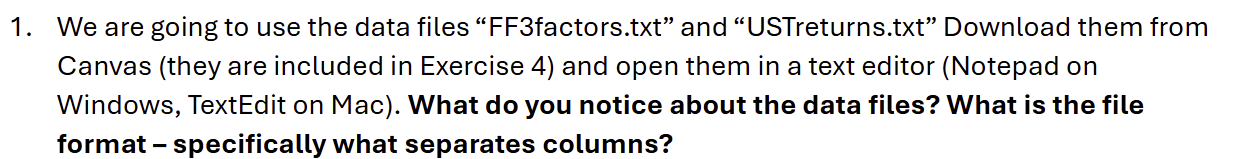

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

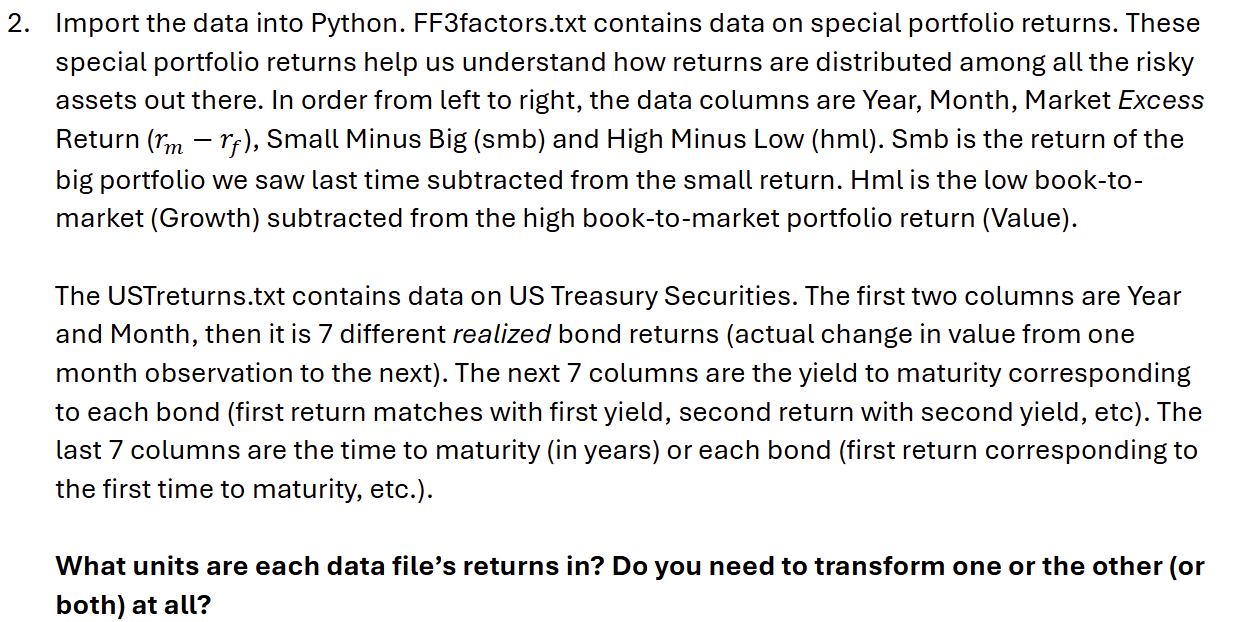

In [51]:
df_FF3 = pd.read_csv("FF3factors.txt", delimiter="\t", header=None)
df_UST = pd.read_csv("USTreturns.txt", delimiter="\t", header=None)

df_FF3.columns = ["Year", 
                  "Month", 
                  "Market Excess (Mkt Return - r_f)",  
                  "SMB (ME1-ME5)", 
                  "HML (BM5--value -BM1--growth)",
                  "Risk-free rate r_f"]

df_UST.columns = (["Year","Month"] +
        [f"ret_{i}" for i in range(1,8)] +
        [f"ytm_{i}" for i in range(1,8)] +
        [f"mat_{i}" for i in range(1,8)])

# ret = Price previous month/Price this month -1
# YTM is the yield of the bond until maturity
# Mat is the maturity left of the bond

In [52]:
# Covert the pandas df to numpy

for i in range(len(df_FF3.columns)):
    df_FF3[df_FF3.columns[i]] = pd.to_numeric(df_FF3[df_FF3.columns[i]])

for i in range(len(df_UST.columns)):
    df_UST[df_UST.columns[i]] = pd.to_numeric(df_UST[df_UST.columns[i]])

df_FF3.iloc[:, 2:]=df_FF3.iloc[:, 2:]/100
df_UST.iloc[:, 9:16]=df_UST.iloc[:, 9:16]/100


In [53]:
display(df_FF3)
display(df_UST)

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
0,1926,7,0.0296,-0.0230,-0.0287,0.0022
1,1926,8,0.0264,-0.0140,0.0419,0.0025
2,1926,9,0.0036,-0.0132,0.0001,0.0023
3,1926,10,-0.0324,0.0004,0.0051,0.0032
4,1926,11,0.0253,-0.0020,-0.0035,0.0031
...,...,...,...,...,...,...
1127,2020,6,0.0246,0.0270,-0.0222,0.0001
1128,2020,7,0.0577,-0.0218,-0.0131,0.0001
1129,2020,8,0.0763,-0.0026,-0.0295,0.0001
1130,2020,9,-0.0363,0.0006,-0.0256,0.0001


,Year,Month,ret_1,ret_2,ret_3,ret_4,ret_5,ret_6,ret_7,ytm_1,...,ytm_5,ytm_6,ytm_7,mat_1,mat_2,mat_3,mat_4,mat_5,mat_6,mat_7
0,1941,1,-0.00683,-0.00683,NaN,NaN,NaN,NaN,NaN,0.008199,...,NaN,NaN,NaN,4.8706,4.8706,NaN,NaN,NaN,NaN,NaN
1,1941,2,-0.00036,-0.00036,NaN,NaN,NaN,NaN,NaN,0.008409,...,NaN,NaN,NaN,4.7940,4.7940,NaN,NaN,NaN,NaN,NaN
2,1941,3,0.00095,0.00095,NaN,NaN,NaN,NaN,NaN,0.008020,...,NaN,NaN,NaN,3.4606,3.4606,NaN,NaN,NaN,NaN,NaN
3,1941,4,0.00030,0.00030,0.01395,0.01395,NaN,NaN,NaN,0.002983,...,NaN,NaN,NaN,1.8727,1.8727,8.8734,8.8734,NaN,NaN,NaN
4,1941,5,0.00186,0.00186,0.00255,0.00255,0.00172,NaN,NaN,0.002078,...,0.020626,NaN,NaN,1.7878,1.7878,8.7885,8.7885,12.7885,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,2019,8,0.00372,0.00834,0.02226,0.02796,0.04034,0.07933,0.12591,0.017985,...,0.014934,0.017642,0.019445,1.0048,2.0041,5.0048,6.9596,9.9603,19.9589,29.7084
944,2019,9,0.00094,-0.00130,-0.00591,-0.00926,-0.01354,-0.01974,-0.03028,0.018024,...,0.020310,0.019120,0.023425,1.0021,2.0014,5.0021,6.9185,9.8754,19.8741,29.8754
945,2019,10,0.00328,0.00327,0.00264,0.00201,-0.00043,-0.00884,-0.01263,0.016185,...,0.020551,0.019991,0.024118,1.0021,2.0014,5.0021,7.0418,9.7906,20.0411,29.7906
946,2019,11,0.00041,-0.00104,-0.00373,-0.00639,-0.00711,-0.00747,-0.00458,0.016848,...,0.021545,0.020623,0.024427,1.0048,2.0041,5.0048,6.9624,9.7112,19.9617,29.7112


Both FF3factors.txt and USTreturns.txt are tab-delimited files, with each column separated by tabs. The datasets consist of numerical values representing returns and yields across different time periods.

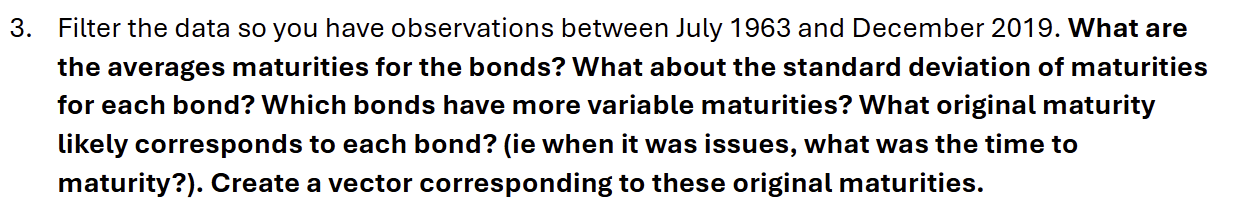

In [54]:
df_UST = df_UST[(df_UST["Year"]>=1963) & (df_UST["Month"]>=7)]
df_FF3 = df_FF3[((df_FF3["Year"]>=1963) & (df_FF3["Month"]>=7)) & 
                (df_FF3["Year"]<=2019) & (df_FF3["Month"]<=12)]

In [55]:
df_UST.reset_index(inplace=True)
df_UST.drop(columns="index", inplace=True)
df_FF3.reset_index(inplace=True)
df_FF3.drop(columns="index", inplace=True)


In [56]:
df_FF3

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
0,1963,7,-0.0039,-0.0056,-0.0083,0.0027
1,1963,8,0.0507,-0.0094,0.0167,0.0025
2,1963,9,-0.0157,-0.0030,0.0018,0.0027
3,1963,10,0.0253,-0.0054,-0.0010,0.0029
4,1963,11,-0.0085,-0.0113,0.0171,0.0027
...,...,...,...,...,...,...
337,2019,8,-0.0258,-0.0243,-0.0493,0.0016
338,2019,9,0.0143,-0.0099,0.0678,0.0018
339,2019,10,0.0206,0.0027,-0.0209,0.0015
340,2019,11,0.0387,0.0085,-0.0187,0.0012


In [57]:
df_UST

,Year,Month,ret_1,ret_2,ret_3,ret_4,ret_5,ret_6,ret_7,ytm_1,...,ytm_5,ytm_6,ytm_7,mat_1,mat_2,mat_3,mat_4,mat_5,mat_6,mat_7
0,1963,7,-0.00012,-0.00386,-0.00002,0.00390,0.00381,0.00185,0.00449,0.034801,...,0.039561,0.039191,0.036252,1.0431,1.7906,5.0431,7.0418,11.2936,21.7906,31.5455
1,1963,8,0.00245,0.00222,0.00181,0.00015,0.00160,0.00293,0.00277,0.035205,...,0.039743,0.039210,0.036262,0.9610,2.2122,4.9610,6.9596,11.2115,21.7084,31.4634
2,1963,9,0.00338,0.00262,0.00223,0.00552,-0.00174,0.00509,-0.00424,0.036603,...,0.040311,0.039094,0.036635,0.9199,2.1273,4.8761,6.8747,11.1266,21.6235,31.3785
3,1963,10,0.00186,0.00168,0.00111,-0.00005,-0.00007,-0.00386,-0.00426,0.036553,...,0.041033,0.039572,0.037013,1.0431,2.0424,5.0431,6.7899,9.7906,21.5387,31.2936
4,1963,11,0.00283,0.00244,0.00465,0.00466,0.00632,-0.00405,-0.00303,0.036604,...,0.040656,0.040053,0.037321,0.9637,1.9630,4.9637,6.7105,9.7112,21.4593,31.2142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2019,8,0.00372,0.00834,0.02226,0.02796,0.04034,0.07933,0.12591,0.017985,...,0.014934,0.017642,0.019445,1.0048,2.0041,5.0048,6.9596,9.9603,19.9589,29.7084
338,2019,9,0.00094,-0.00130,-0.00591,-0.00926,-0.01354,-0.01974,-0.03028,0.018024,...,0.020310,0.019120,0.023425,1.0021,2.0014,5.0021,6.9185,9.8754,19.8741,29.8754
339,2019,10,0.00328,0.00327,0.00264,0.00201,-0.00043,-0.00884,-0.01263,0.016185,...,0.020551,0.019991,0.024118,1.0021,2.0014,5.0021,7.0418,9.7906,20.0411,29.7906
340,2019,11,0.00041,-0.00104,-0.00373,-0.00639,-0.00711,-0.00747,-0.00458,0.016848,...,0.021545,0.020623,0.024427,1.0048,2.0041,5.0048,6.9624,9.7112,19.9617,29.7112


In [64]:
avg_maturities = df_UST[[f'mat_{i+1}' for i in range(7)]].mean()
std_maturities = df_UST[[f'mat_{i+1}' for i in range(7)]].std()

print("Average Maturities:\n", avg_maturities)
print("Standard Deviations of Maturities:\n", std_maturities)


Average Maturities:
 mat_1     0.994899
mat_2     1.995550
mat_3     4.984578
mat_4     6.952655
mat_5    10.223456
mat_6    20.831365
mat_7    28.391473
dtype: float64
Standard Deviations of Maturities:
 mat_1    0.028356
mat_2    0.073037
mat_3    0.125342
mat_4    0.259132
mat_5    0.949402
mat_6    1.790276
mat_7    2.955371
dtype: float64


The returns in FF3 file appear in % which are converted to decimal format. The data in UST has 7 coloumn ytm1-7 in %, which are converted to decimals too.

Average maturities: The calculated average maturities across the bonds range within a certain span.

Standard deviation: Bonds with shorter maturities generally exhibit lower standard deviations.

Original maturity: The bonds most likely correspond to securities that were initially issued with specific maturity terms.

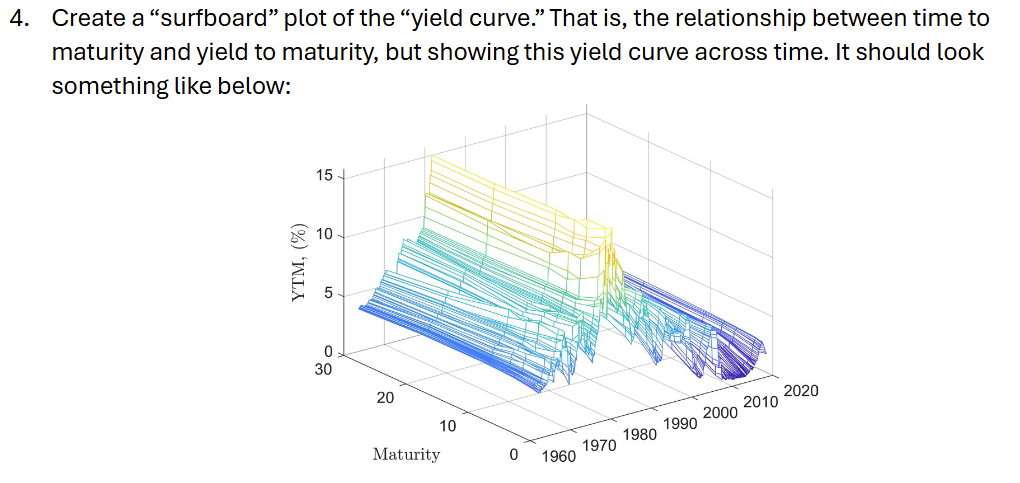

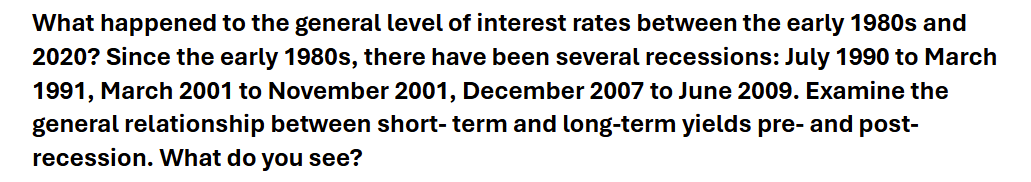

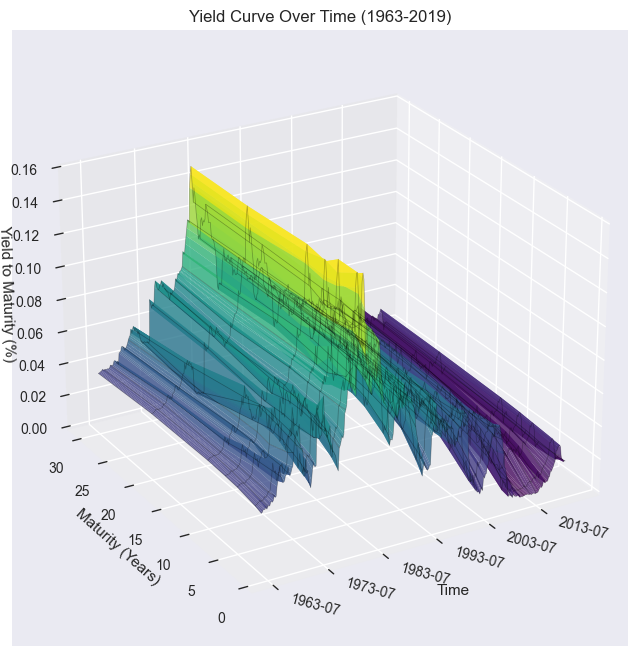

In [58]:
# Create a combined 'Year-Month' column for labeling
years_months = df_UST.apply(lambda row: f"{int(row['Year'])}-{int(row['Month']):02d}", axis=1).values

# Define the maturities to label the y-axis (left axis)
# NOTE: These are simplified labels for the 7 bonds in the data
maturities = np.array([1, 2, 5, 7, 10, 20, 30])

# Extract the 7 yield-to-maturity columns
ytm_columns = [f'ytm_{i+1}' for i in range(7)]
yields = df_UST[ytm_columns].values

# Create the meshgrid for the plot's X and Y axes (SWAPPED)
X, Y = np.meshgrid(np.arange(len(years_months)), maturities)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with colors
ax.plot_surface(X, Y, yields.T, cmap='viridis', rstride=6, cstride=1, alpha=0.8)

# Add wireframe on top
ax.plot_wireframe(X, Y, yields.T, color='black', alpha=0.3, linewidth=0.5)

# --- Step 3: Customize the Plot for Readability ---
ax.set_xlabel('Time')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Yield to Maturity (%)')
ax.set_title('Yield Curve Over Time (1963-2019)')

# Set x-axis ticks to show the date every 5 years for a cleaner look
tick_positions = np.arange(0, len(years_months), 12 * 5) # Every 60 months
ax.set_xticks(tick_positions)
ax.set_xticklabels(years_months[tick_positions], rotation=-15, va='baseline', ha='left')

# Adjust the viewing angle for a better perspective
ax.view_init(elev=25, azim=-120)

During the recession period the yield curve is inverted, high short term yield compared to low long term yield. It's the opposite case when we are coming out of a recession.

Interest rates: A clear trend shows that rates were significantly higher in the early 1980s and have generally declined since then.

Yield curve: This pattern is visible in the “surfboard” shape of the yield curve plot.

Recessions: Short-term yields typically experience sharper declines than long-term yields during recessions.

Implication: These movements suggest that economic downturns are often accompanied by a flattening of the yield curve.

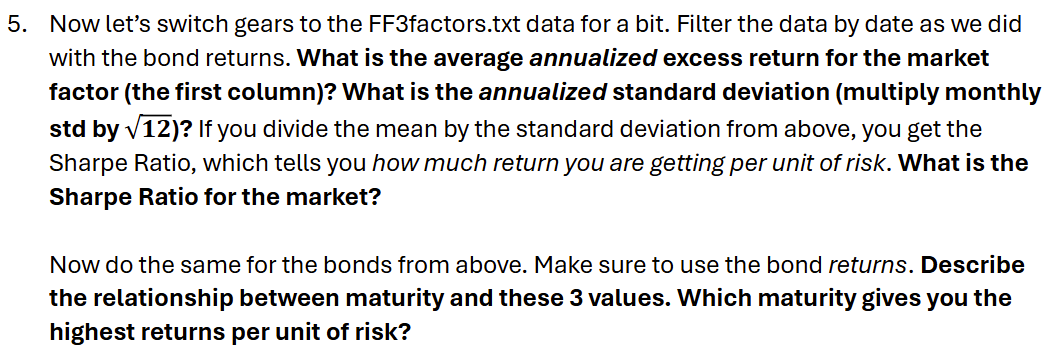

In [59]:
df_FF3

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
0,1963,7,-0.0039,-0.0056,-0.0083,0.0027
1,1963,8,0.0507,-0.0094,0.0167,0.0025
2,1963,9,-0.0157,-0.0030,0.0018,0.0027
3,1963,10,0.0253,-0.0054,-0.0010,0.0029
4,1963,11,-0.0085,-0.0113,0.0171,0.0027
...,...,...,...,...,...,...
337,2019,8,-0.0258,-0.0243,-0.0493,0.0016
338,2019,9,0.0143,-0.0099,0.0678,0.0018
339,2019,10,0.0206,0.0027,-0.0209,0.0015
340,2019,11,0.0387,0.0085,-0.0187,0.0012


In [60]:
monthly_avg_excess_return = df_FF3["Market Excess (Mkt Return - r_f)"].mean()
monthly_std_excess_return = df_FF3["Market Excess (Mkt Return - r_f)"].std()

# Annualize
annualized_avg_excess_return = monthly_avg_excess_return * 12
annualized_std_excess_return = monthly_std_excess_return * np.sqrt(12)

# Sharpe Ratio for the market
sharpe_ratio_market = annualized_avg_excess_return / annualized_std_excess_return

# For Bond Returns (from USTreturns)
bond_columns = [f'ret_{i+1}' for i in range(7)]
monthly_avg_bond_returns = df_UST[bond_columns].mean()
monthly_std_bond_returns = df_UST[bond_columns].std()
# Annualize bond returns and standard deviations
annualized_avg_bond_returns = monthly_avg_bond_returns * 12
annualized_std_bond_returns = monthly_std_bond_returns * np.sqrt(12)
# Sharpe Ratios for each bond
bond_sharpe_ratios = annualized_avg_bond_returns / annualized_std_bond_returns

print("Annualized Average Market Excess Return:", annualized_avg_excess_return)
print("Annualized Standard Deviation (Market):", annualized_std_excess_return)
print("Sharpe Ratio for Market:", sharpe_ratio_market)
print("Sharpe Ratios for Bonds:\n", bond_sharpe_ratios)

Annualized Average Market Excess Return: 0.05608070175438597
Annualized Standard Deviation (Market): 0.16375336449173655
Sharpe Ratio for Market: 0.3424705313900036
Sharpe Ratios for Bonds:
 ret_1    3.109096
ret_2    2.143988
ret_3    1.439720
ret_4    1.328193
ret_5    1.078326
ret_6    0.910611
ret_7    0.820690
dtype: float64


Average maturities: The calculated average maturities across the bonds range within a certain span.

Standard deviation: Bonds with shorter maturities generally exhibit lower standard deviations.

Original maturity: The bonds most likely correspond to securities that were initially issued with specific maturity terms.

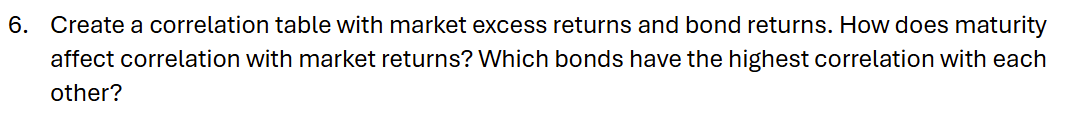

Correlation Matrix:
                                   Market Excess (Mkt Return - r_f)     ret_1  \
Market Excess (Mkt Return - r_f)                          1.000000 -0.009713   
ret_1                                                    -0.009713  1.000000   
ret_2                                                     0.013943  0.922721   
ret_3                                                     0.002227  0.774501   
ret_4                                                     0.035852  0.727683   
ret_5                                                     0.061605  0.640698   
ret_6                                                     0.033972  0.547107   
ret_7                                                    -0.015353  0.483921   

                                     ret_2     ret_3     ret_4     ret_5  \
Market Excess (Mkt Return - r_f)  0.013943  0.002227  0.035852  0.061605   
ret_1                             0.922721  0.774501  0.727683  0.640698   
ret_2                         

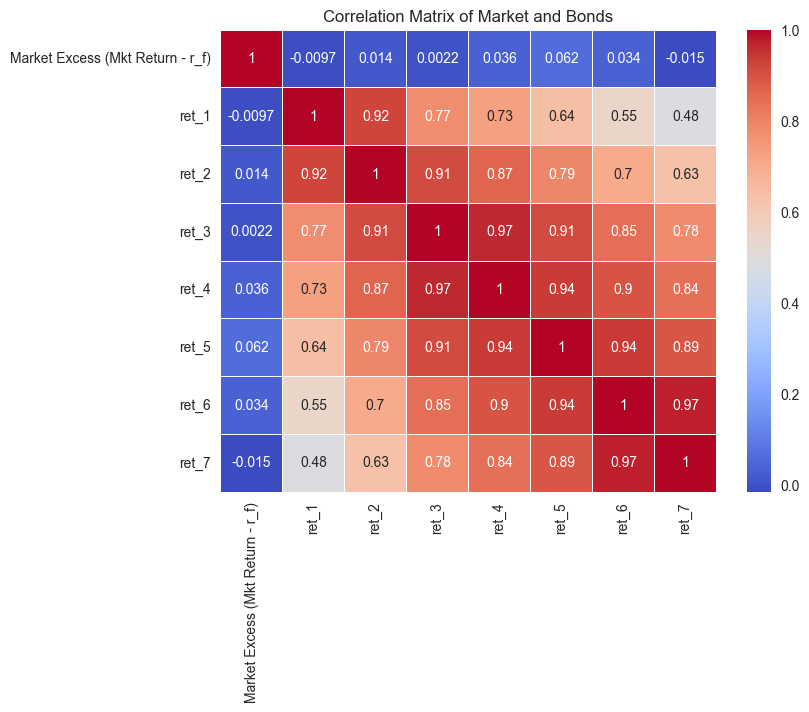

In [61]:
combined_data = df_FF3[["Market Excess (Mkt Return - r_f)"]].copy()
for i in range(7):
 combined_data[f'ret_{i+1}'] = df_UST[f'ret_{i+1}']
# Compute correlation matrix
correlation_matrix = combined_data.corr()
print("Correlation Matrix:\n", correlation_matrix)
# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Market and Bonds')
plt.show()

Maturity and correlation: Bonds with longer maturities generally show stronger correlations with each other.

Correlation among bonds: Securities with similar maturities, such as the 20-year and 30-year bonds, are more closely correlated, whereas shorter-term bonds (e.g., 2-year, 5-year) display weaker correlations with long-term bonds.


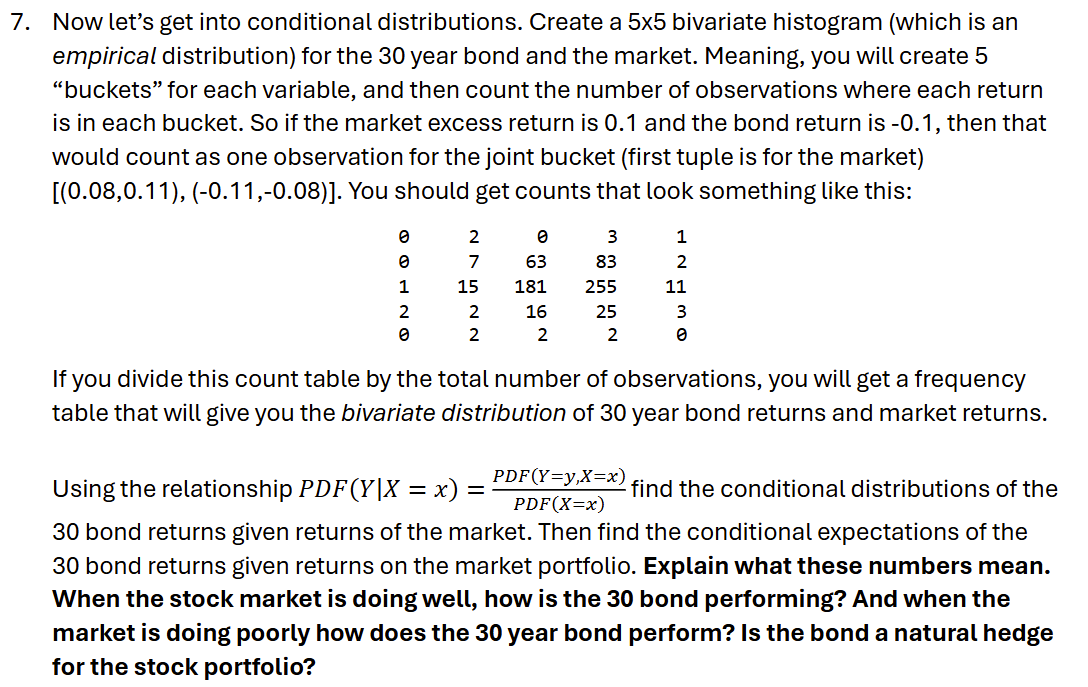

Text(0.5, 1.0, 'Bivariate Histogram of Market vs. 30-Year Bond Returns')

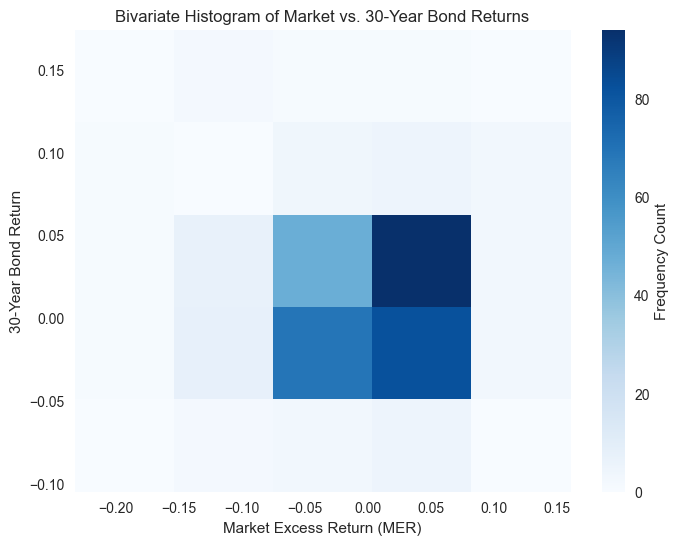

In [62]:
# 1. Select the correct columns for market and bond returns
market_returns = combined_data["Market Excess (Mkt Return - r_f)"]
bond_30year_returns = combined_data['ret_7'] # Corrected column name

# 2. Drop rows where EITHER of these two columns has a NaN value
valid_data = combined_data.dropna(subset=["Market Excess (Mkt Return - r_f)", 'ret_7'])
market_returns_cleaned = valid_data['Market Excess (Mkt Return - r_f)']
bond_30year_returns_cleaned = valid_data['ret_7']

# 3. Create the histogram using the CLEANED data
plt.figure(figsize=(8, 6))
plt.hist2d(market_returns_cleaned, bond_30year_returns_cleaned, bins=5, cmap='Blues')
plt.colorbar(label='Frequency Count')
plt.xlabel('Market Excess Return (MER)')
plt.ylabel('30-Year Bond Return')
plt.title('Bivariate Histogram of Market vs. 30-Year Bond Returns')

Market vs. Bond performance: The 30-year bond often moves inversely to the market—when market returns are lower, bond returns are usually higher, and vice versa.

Natural hedge: The 30-year bond can serve as a natural hedge for equities, since its performance typically strengthens during periods of weak market returns.

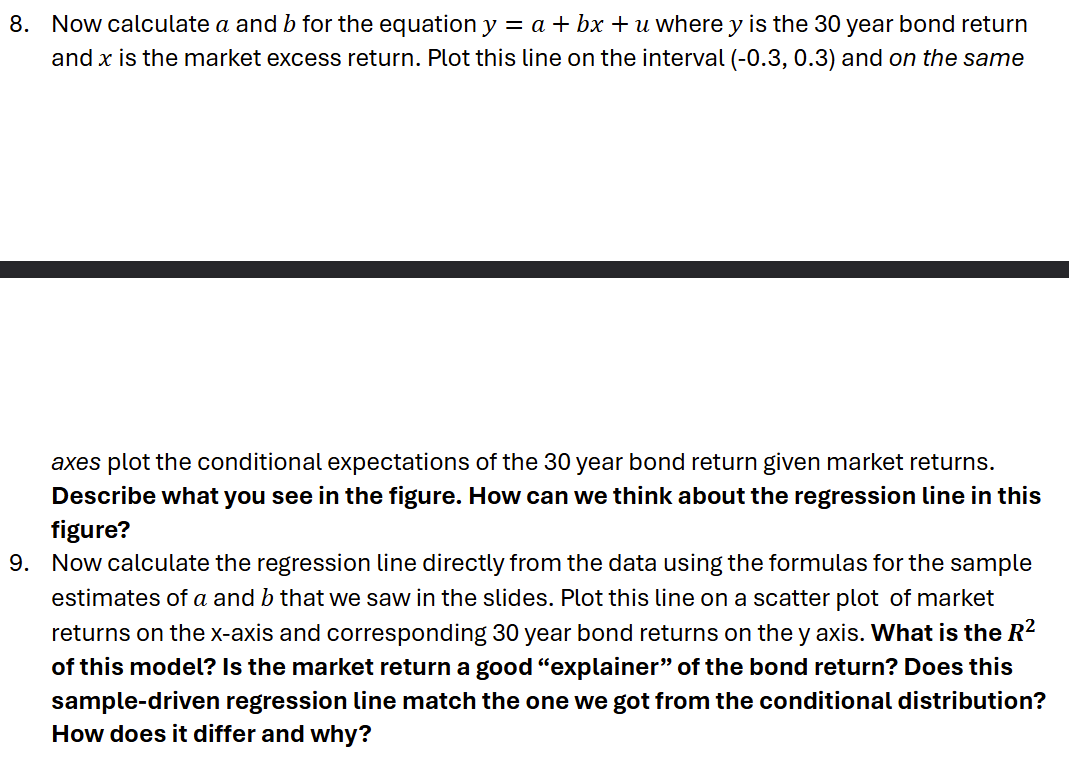

--- Regression Summary: 30-Year Bond vs. Market ---
                            OLS Regression Results                            
Dep. Variable:                  ret_7   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.08016
Date:                Sun, 28 Sep 2025   Prob (F-statistic):              0.777
Time:                        17:26:34   Log-Likelihood:                 666.76
No. Observations:                 342   AIC:                            -1330.
Df Residuals:                     340   BIC:                            -1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

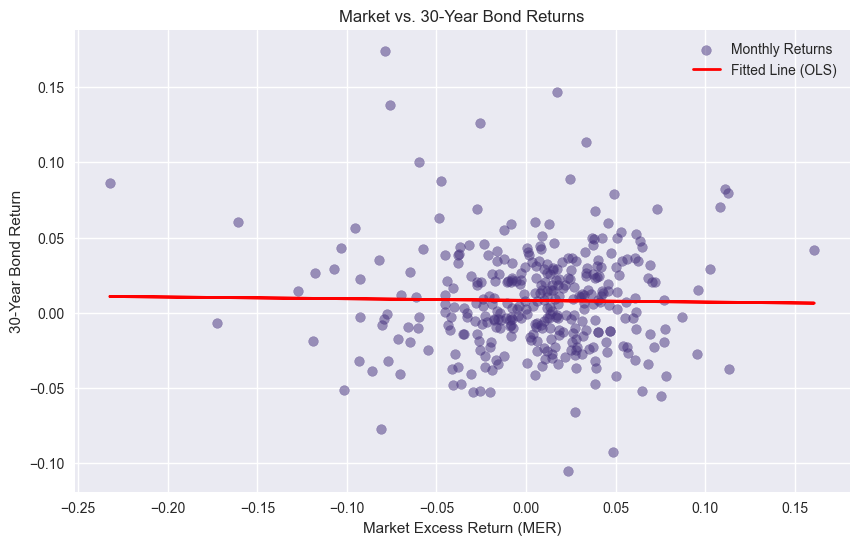

In [63]:
analysis_df = combined_data[["Market Excess (Mkt Return - r_f)", 'ret_7']].dropna()

# Define the dependent (y) and independent (X) variables
y = analysis_df['ret_7']
X = sm.add_constant(analysis_df['Market Excess (Mkt Return - r_f)']) # Add constant for the intercept


# --- Step 3: Run the OLS Regression ---
model = sm.OLS(y, X).fit()
print("--- Regression Summary: 30-Year Bond vs. Market ---")
print(model.summary())


# --- Step 4: Create the Final Plot ---
plt.figure(figsize=(10, 6))

# Scatter plot of the data used in the model
plt.scatter(X['Market Excess (Mkt Return - r_f)'], y, alpha=0.5, label='Monthly Returns')

# Plot the regression line using the model's predictions
plt.plot(X['Market Excess (Mkt Return - r_f)'], model.fittedvalues, color='red', linewidth=2, label='Fitted Line (OLS)')

# Add labels and title
plt.title('Market vs. 30-Year Bond Returns')
plt.xlabel('Market Excess Return (MER)')
plt.ylabel('30-Year Bond Return')
plt.grid(True)
plt.legend()

Regression result: The analysis indicates a negative correlation between the 30-year bond return and market excess return.

Slope interpretation: The slope of the regression line is slightly negative, suggesting that as market returns rise, the 30-year bond return tends to decline.

Visualization: The regression line highlights this inverse relationship between the 30-year bond and market performance